In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
advertising = advertising.drop(columns=['Unnamed: 0'])
advertising = advertising.reset_index(drop=True)
advertising.head()

,TV,Radio,Newspaper,Sales
0,17.2,45.9,69.3,9.3
1,151.5,41.3,58.5,18.5
2,180.8,10.8,58.4,12.9
3,8.7,48.9,75.0,7.2
4,57.5,32.8,23.5,11.8


**Data Inspection**

In [ ]:
advertising.shape

(198, 4)

In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [ ]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,147.140909,23.109596,30.285354,14.000000
std,85.775163,14.841284,21.688609,5.205756
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.175000,44.050000,17.375000
max,296.400000,49.600000,114.000000,27.000000


**Data Cleaning**

In [ ]:
advertising.isnull().sum()*100/advertising.shape[0]

,0
TV,0.0
Radio,0.0
Newspaper,0.0
Sales,0.0


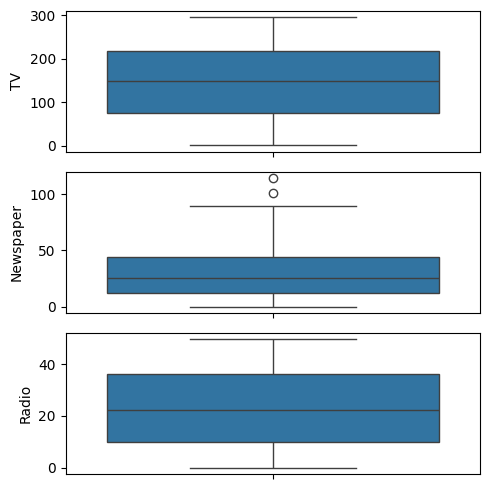

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

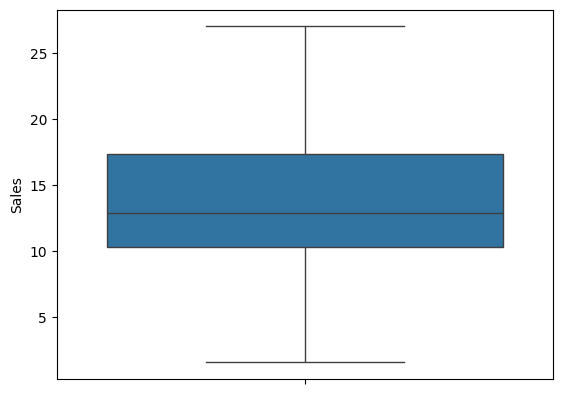

In [ ]:
sns.boxplot(advertising['Sales'])
plt.show()

Exploratory Data Analysis

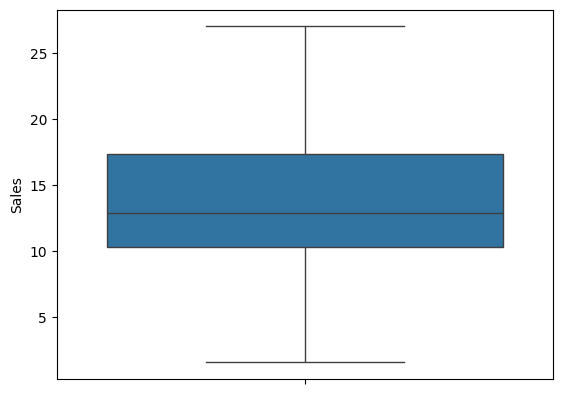

In [ ]:
sns.boxplot(advertising['Sales'])
plt.show()

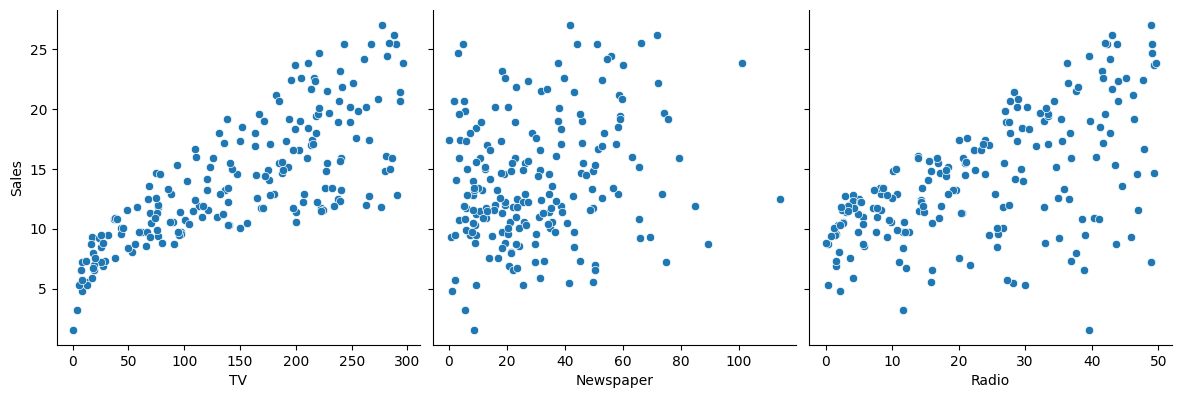

In [ ]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

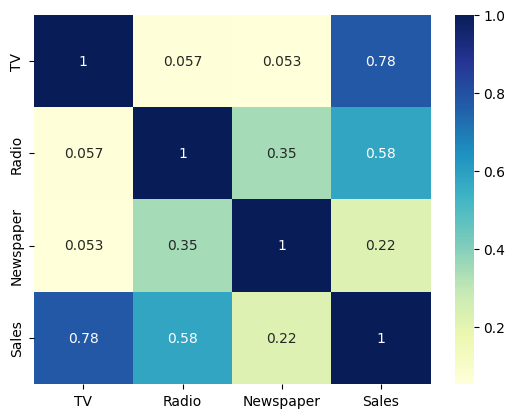

In [ ]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

Generic Steps in model building using statsmodels

In [ ]:
X = advertising['TV']
y = advertising['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
# Let's now take a look at the train dataset

X_train.head()

,TV
74,27.5
3,8.7
183,205.0
26,248.8
90,217.7


In [ ]:
y_train.head()

,Sales
74,6.9
3,7.2
183,22.6
26,18.9
90,19.4


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

,0
const,7.324193
TV,0.044972


In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     178.8
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.47e-26
Time:                        13:19:54   Log-Likelihood:                -364.16
No. Observations:                 138   AIC:                             732.3
Df Residuals:                     136   BIC:                             738.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3242      0.580     12.624      0.0

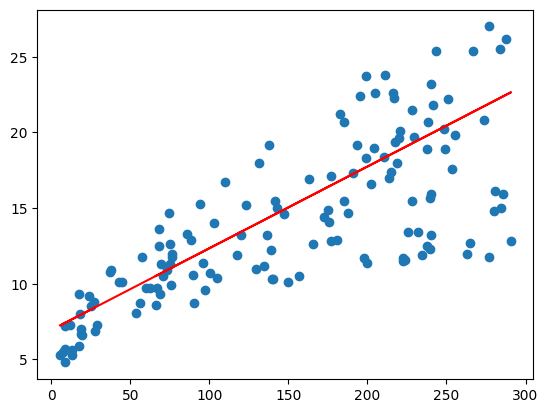

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

Model Evaluation

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

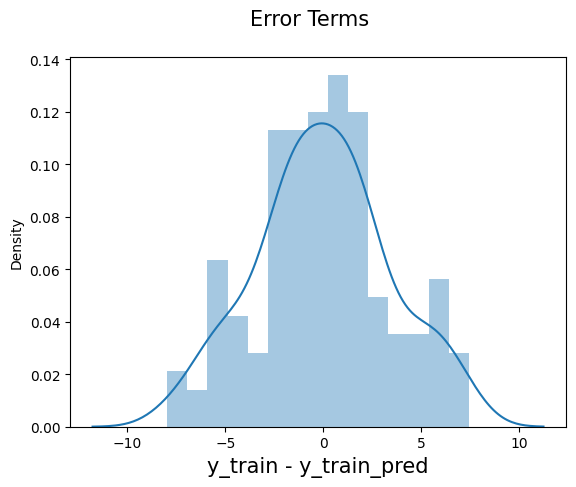

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

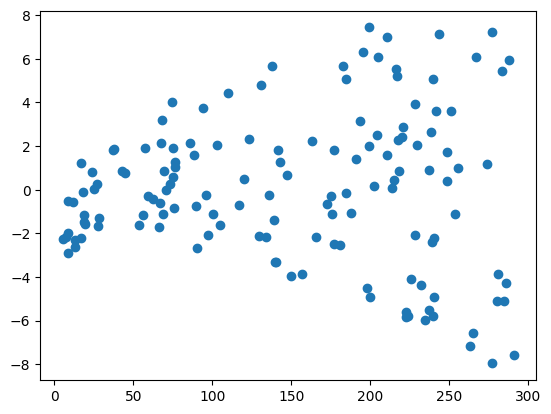

In [ ]:
plt.scatter(X_train,res)
plt.show()

Predictions on the Test Set

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

,0
126,17.231593
104,8.448501
99,20.653987
92,12.154219
111,16.750390


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.9150192802880315

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6953517354455648

Visualizing the fit on the test set

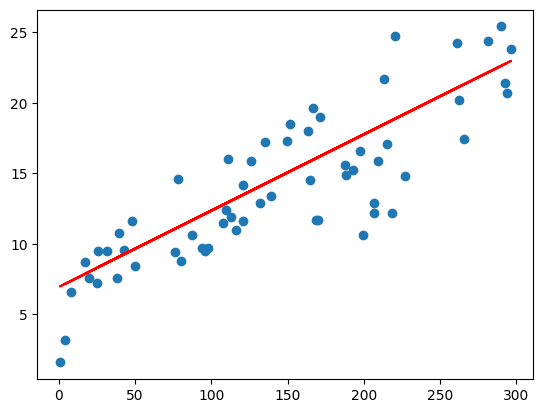

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()